Step 2: Nonlinear Convection and Upwind Scheme
-----
***

Now we're going to implement nonlinear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [1]:
import numpy as np               # we're importing numpy 
import matplotlib.pyplot as plt # and our 2D plotting library

%matplotlib inline


nx = 141
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
#dt = .025  #dt is the amount of time each timestep covers (delta t)

u = np.ones(nx)                         #as before, we initialize u with every value equal to 1.
u[:]= 1
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

CFL = 0.9
dt = CFL * dx / max(abs(u))

un = np.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

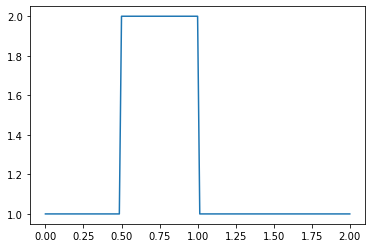

In [2]:
plt.plot(np.linspace(0, 2, nx), u);
plt.show()

The code snippet below is to execute the nonlinear convection:


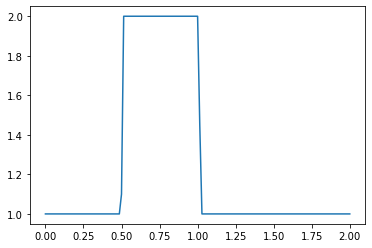

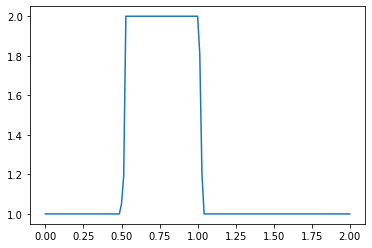

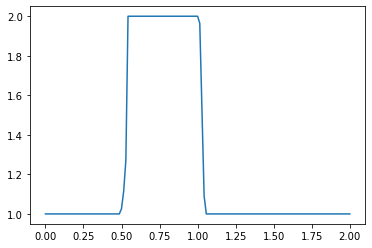

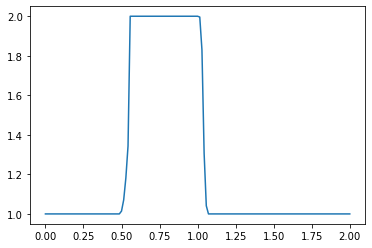

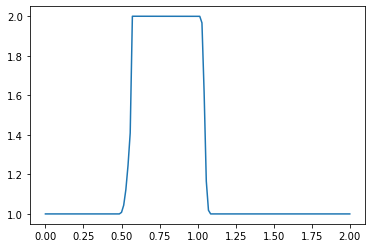

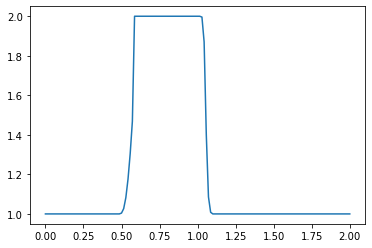

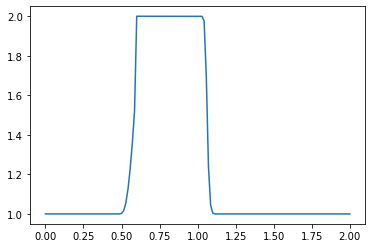

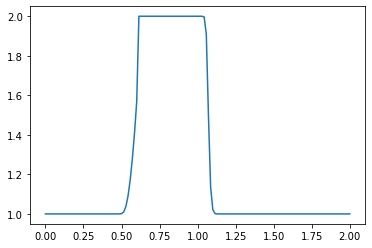

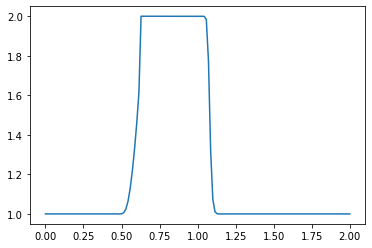

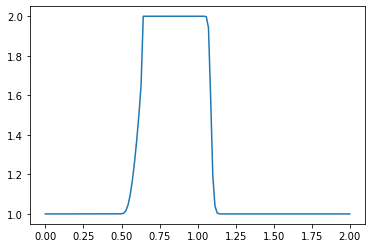

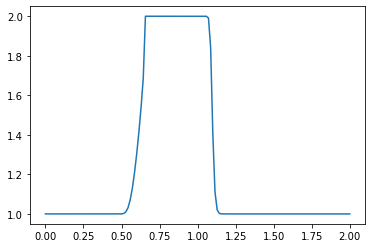

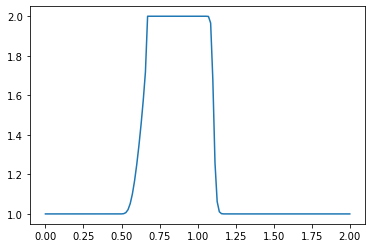

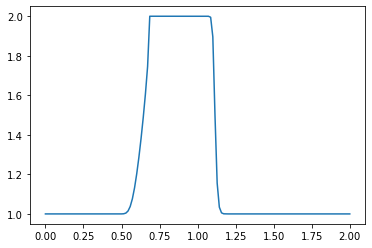

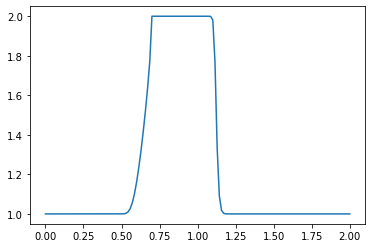

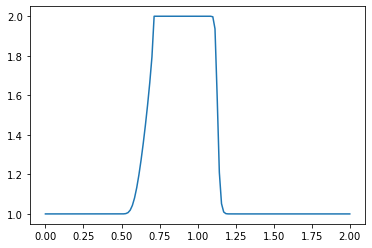

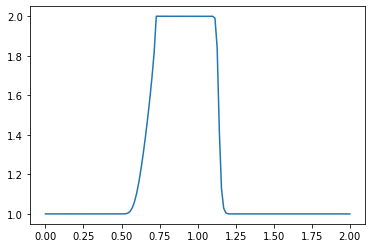

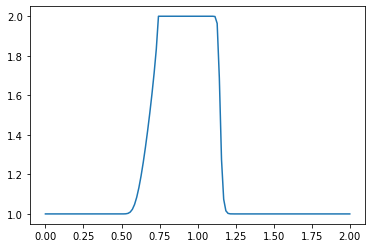

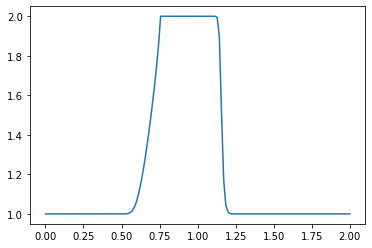

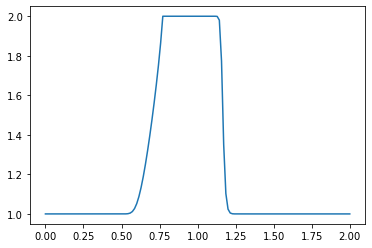

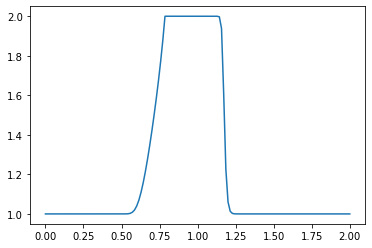

In [3]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    

    for i in range(1, nx-1):  ##now we'll iterate through the u array
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])        
    plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
    plt.show()

What do you observe about the evolution of the hat function under the nonlinear convection equation? What happens when you change the numerical parameters and run again?

For example, what happens if we switch our initial values from positive to negative?

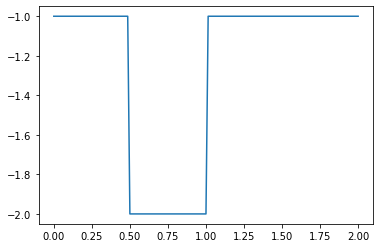

In [4]:
u[:]= -1
u[int(.5 / dx) : int(1 / dx + 1)] = -2  #then set u = 2 between 0.5 and 1 as per our I.C.s

plt.plot(np.linspace(0, 2, nx), u);
plt.show()

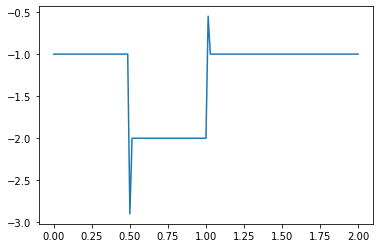

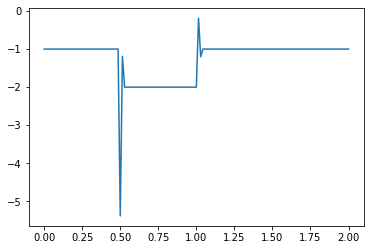

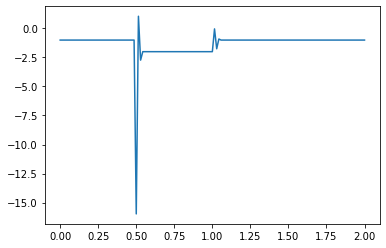

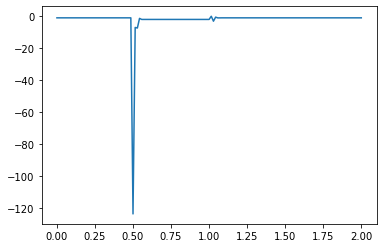

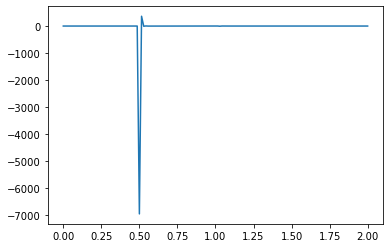

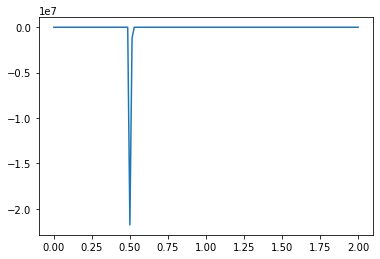

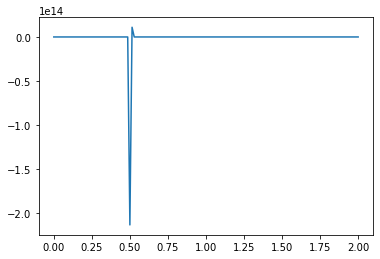

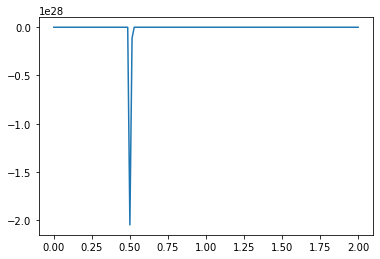

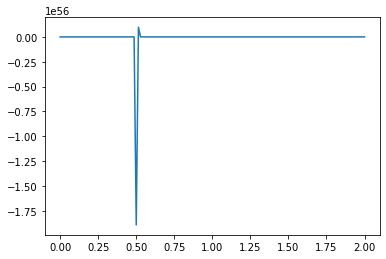

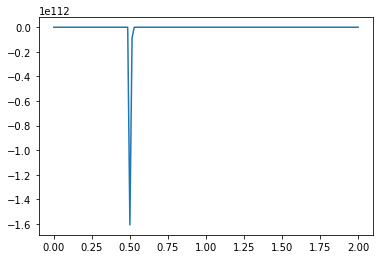

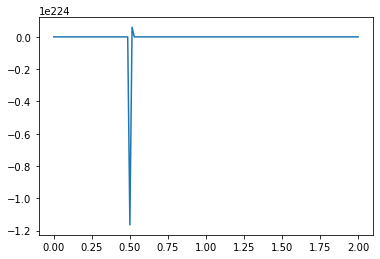

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


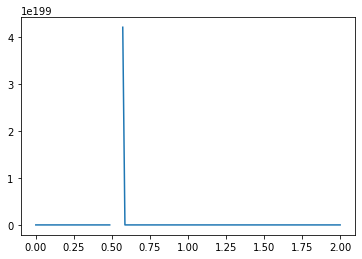

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


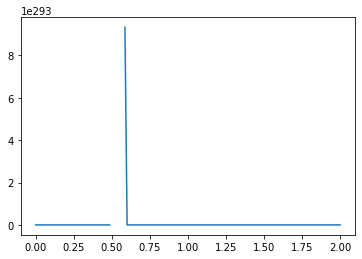

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


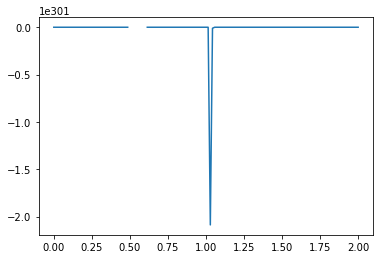

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


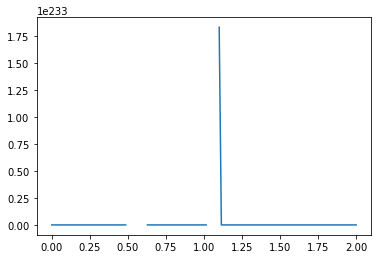

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


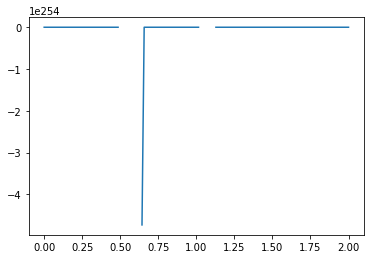

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


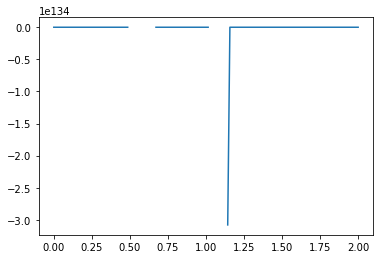

/tmp/ipykernel_21073/2793021359.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


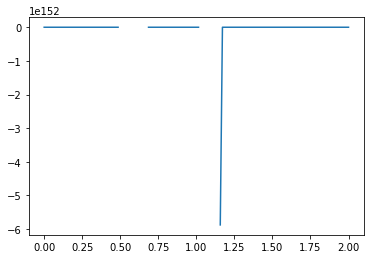

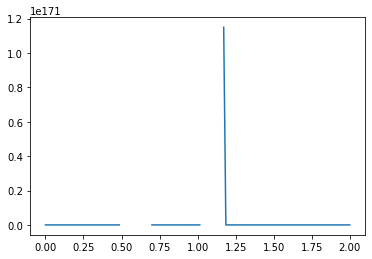

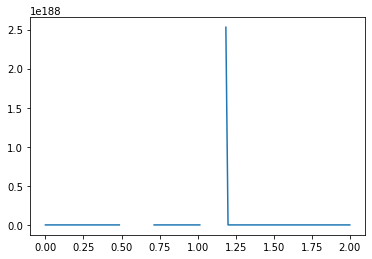

In [5]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    

    for i in range(1, nx-1):  ##now we'll iterate through the u array
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])        
    plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
    plt.show()

**What causes the divergence in computational results when a negative initial condition is applied?** 

The divergence in results when using a negative initial condition in your computational model can be attributed to the limitations of the backward scheme used for discretizing the convection term. The backward scheme, represented by \\(\frac{u_i^n - u_{i-1}^n}{\Delta x}\\), is efficient for positive convection coefficients. However, it becomes less effective when dealing with negative nonlinear convection coefficients, like \\(u^n_i\\) in your case.

To address this issue, you can introduce the upwind scheme for discretizing the convection term. The upwind scheme is designed to handle both positive and negative convection coefficients effectively. Its fundamental idea is to adjust the discretization direction based on the sign of the convection coefficient. When the convection coefficient is positive, the upwind scheme uses values from the upstream (or 'upwind') side of the computational domain for discretization, similar to the backward scheme. Conversely, when the convection coefficient is negative, it uses values from the downstream (or 'downwind') side, similar to the forward scheme.

Here is the code implementation of the upwind scheme:

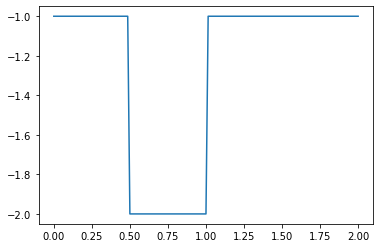

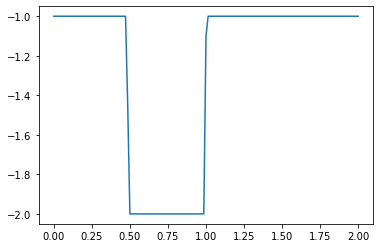

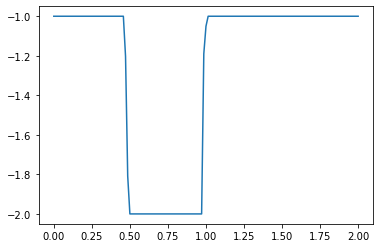

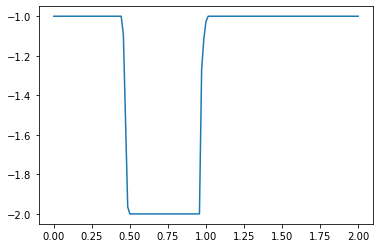

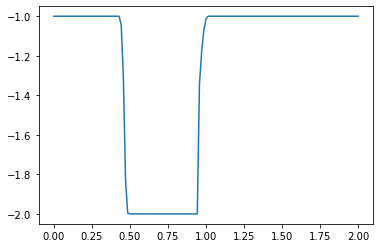

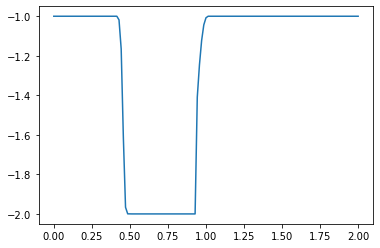

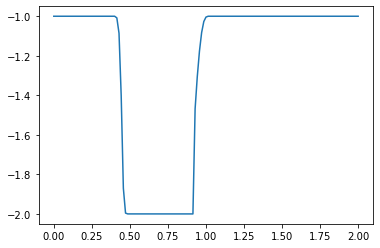

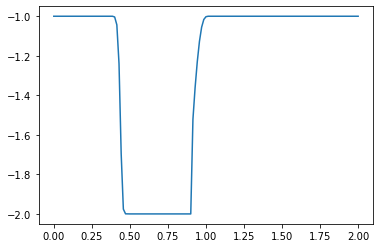

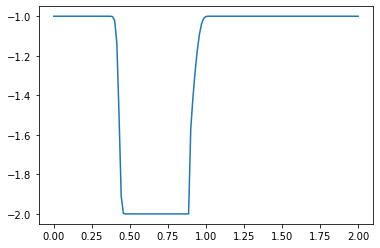

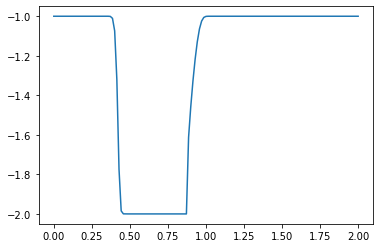

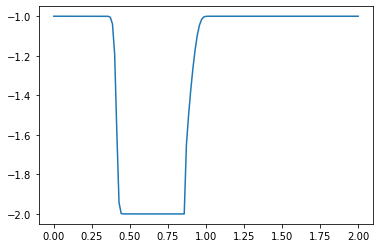

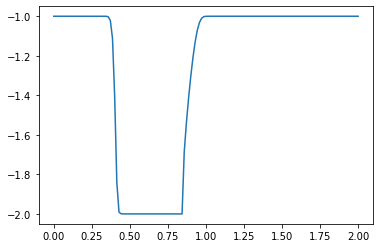

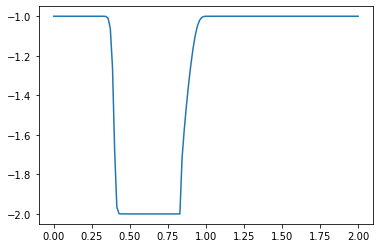

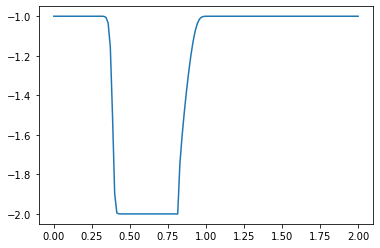

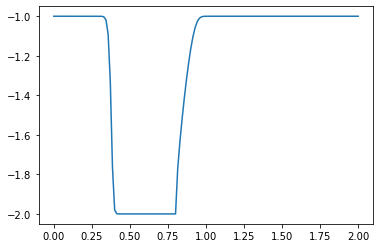

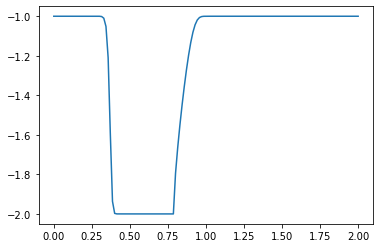

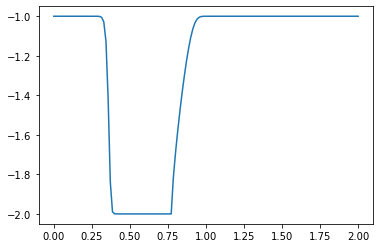

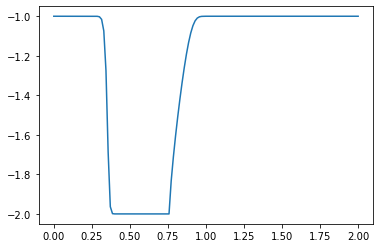

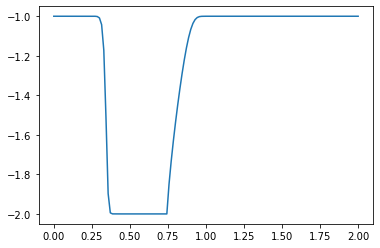

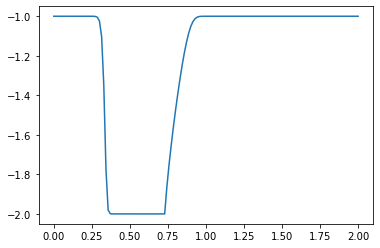

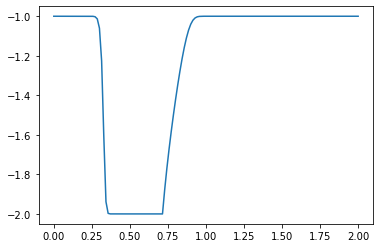

In [6]:
u[:]= -1
u[int(.5 / dx) : int(1 / dx + 1)] = -2  #then set u = 2 between 0.5 and 1 as per our I.C.s

plt.plot(np.linspace(0, 2, nx), u);
plt.show()

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    
    F = lambda c: (max(c/(abs(c)+1e-6), 0), max(-c/(abs(c)+1e-6), 0))
    
    for i in range(1, nx-1):  ##now we'll iterate through the u array
        # Coefficients to the east side of the node (i+1)
        fe1, fe2 = F(u[i])
        # Coefficients to the west side of the node (i-1)
        fw1, fw2 = F(u[i])
        # Differential values on the east side interface
        ue = un[i] * fe1 + un[i+1] * fe2
        # Differential values on the wast side interface
        uw = un[i-1] * fw1 + un[i]* fw2
        u[i] = un[i] - un[i] * dt / dx * (ue - uw)

        #u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])        
    plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
    plt.show()